http://ucanalytics.com/blogs/step-by-step-graphic-guide-to-forecasting-through-arima-modeling-in-r-manufacturing-case-study-example/
ARIMA Model – Manufacturing Case Study Example
Back to our manufacturing case study example where you are helping PowerHorse Tractors with sales forecasting for them to manage their inventories and suppliers. The following sections in this article represent your analysis in the form of a graphic guide.

You could find the data shared by PowerHorse’s MIS team at the following link Tractor Sales. You may want to analyze this data to revalidate the analysis you will carry-out in the following sections.
Now you are ready to start with your analysis to forecast tractors sales for the next 3 years.

Step 1: Plot tractor sales data as time series

To begin with you have prepared a time series plot for the data. The following is the R code you have used to read the data in R and plot a time series chart.

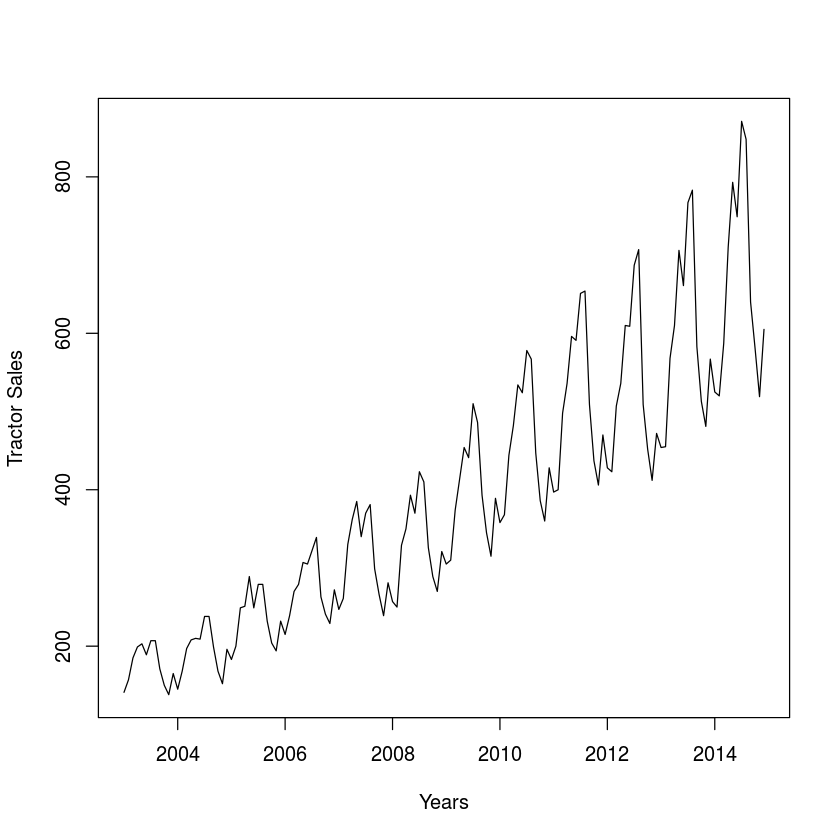

In [1]:
data = read.csv('http://ucanalytics.com/blogs/wp-content/uploads/2015/06/Tractor-Sales.csv')
data = ts(data[,2],start = c(2003,1),frequency = 12)
plot(data, xlab='Years', ylab = 'Tractor Sales')

Step 2: Difference data to make data stationary on mean (remove trend)

The next thing to do is to make the series stationary as learned in the previous article. This to remove the upward trend through 1st order differencing the series using the following formula:

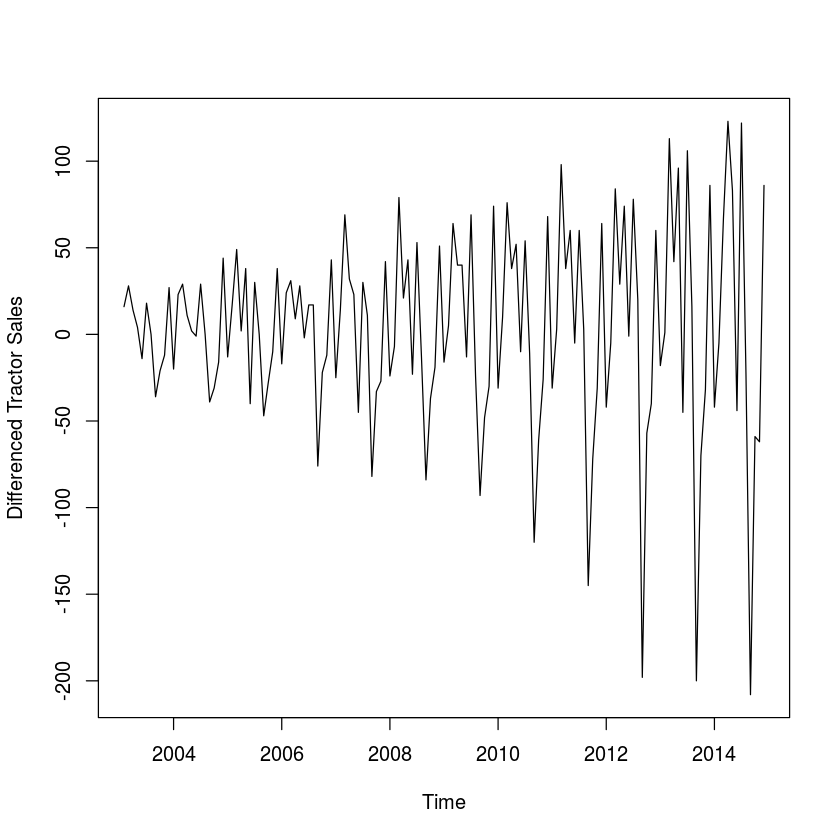

In [3]:
plot(diff(data),ylab='Differenced Tractor Sales')


Step 3: log transform data to make data stationary on variance

One of the best ways to make a series stationary on variance is through transforming the original series through log transform. We will go back to our original tractor sales series and log transform it to make it stationary on variance. The following equation represents the process of log transformation mathematically:

Log of sales	 Y_{t}^{new}=log_{10}(Y_t) 
The following is the R code for the same with the output plot. Notice, this series is not stationary on mean since we are using the original data without differencing.


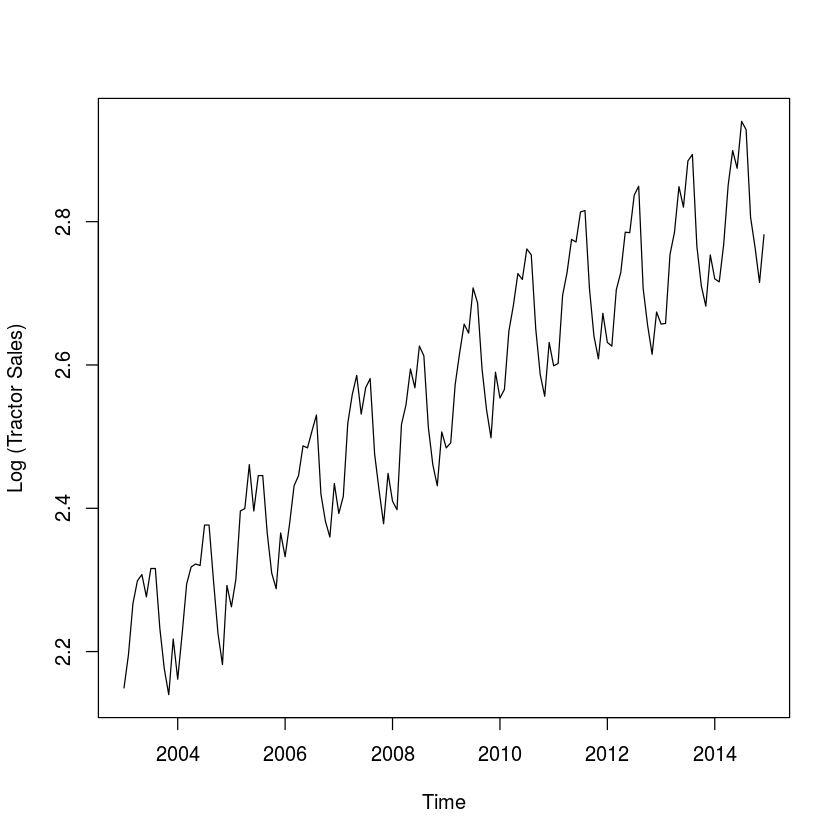

In [5]:
plot(log10(data),ylab='Log (Tractor Sales)')

Step 4: Difference log transform data to make data stationary on both mean and variance

Let us look at the differenced plot for log transformed series to reconfirm if the series is actually stationary on both mean and variance.

1st Differencing (d=1) of log of sales	 Y_{t}^{new'}=log_{10}(Y_t) -log_{10}(Y_{t-1}) 

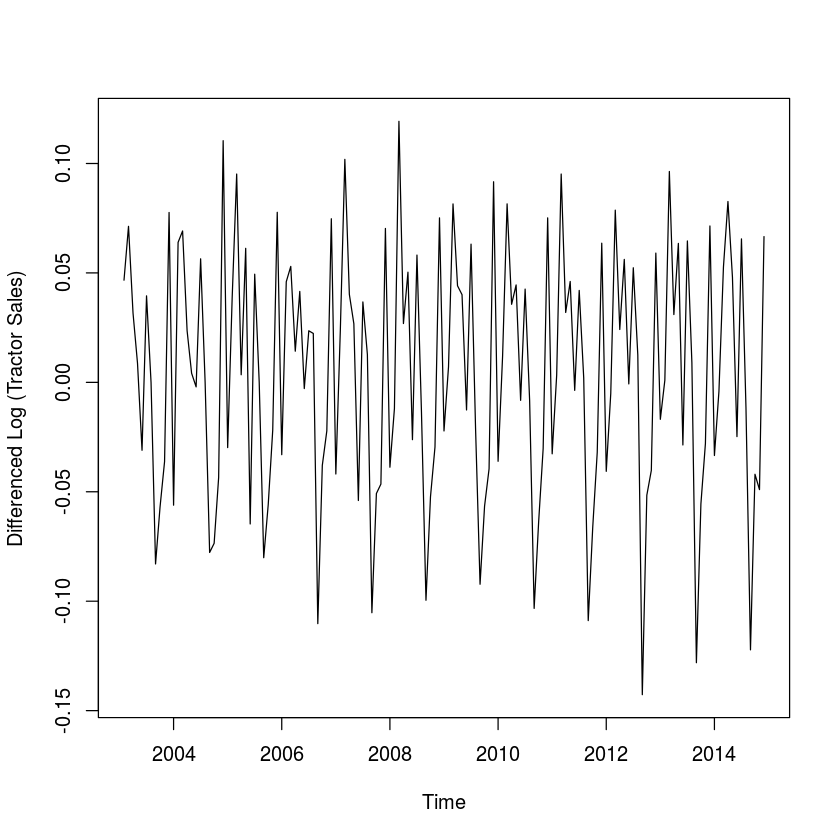

In [7]:
plot(diff(log10(data)),ylab='Differenced Log (Tractor Sales)')


Step 5: Plot ACF and PACF to identify potential AR and MA model

Now, let us create autocorrelation factor (ACF) and partial autocorrelation factor (PACF) plots to identify patterns in the above data which is stationary on both mean and variance. The idea is to identify presence of AR and MA components in the residuals. The following is the R code to produce ACF and PACF plots.

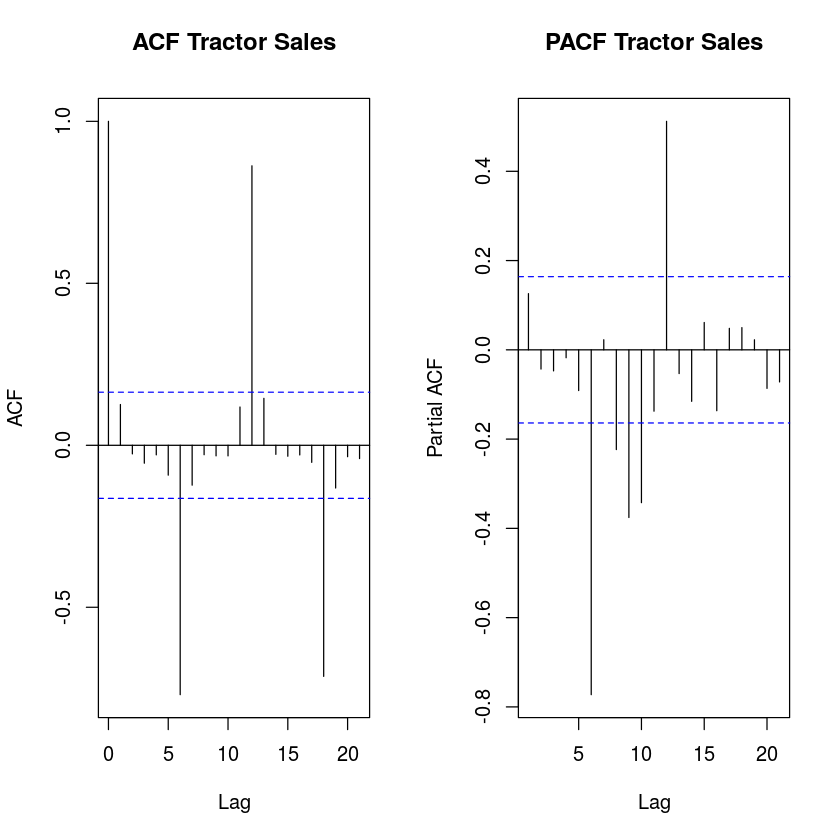

In [9]:
par(mfrow = c(1,2))
acf(ts(diff(log10(data))),main='ACF Tractor Sales')
pacf(ts(diff(log10(data))),main='PACF Tractor Sales')


Step 6: Identification of best fit ARIMA model

Auto arima function in forecast package in R helps us identify the best fit ARIMA model on the fly. The following is the code for the same. Please install the required ‘forecast’ package in R before executing this code.

In [11]:
require(forecast)
ARIMAfit = auto.arima(log10(data), approximation=FALSE,trace=FALSE)
summary(ARIMAfit)

Loading required package: forecast
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”

ERROR: Error in eval(expr, envir, enclos): could not find function "auto.arima"


Step 6: Forecast sales using the best fit ARIMA model

The next step is to predict tractor sales for next 3 years i.e. for 2015, 2016, and 2017 through the above model. The following R code does this job for us.

In [13]:
par(mfrow=c(1,2))
acf(ts(ARIMAfit$residuals),main='ACF Residual')
pacf(ts(ARIMAfit$residuals),main='PACF Residual')

ERROR: Error in is.data.frame(data): object 'ARIMAfit' not found
